## DNN

In [80]:
from epftoolbox.models import hyperparameter_optimizer
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
from epftoolbox.evaluation import MAE, sMAPE
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

np.random.seed(245)


In [81]:
%run C:\Users\CTLGNN00C\Documents\GitHub\epftoolbox\epftoolbox\data\_datasets.py
%run C:\Users\CTLGNN00C\Documents\GitHub\epftoolbox\epftoolbox\models\_dnn.py

In [82]:
path = "C:/Users/CTLGNN00C/Documents/ENERGY/Progetto MGP"

In [83]:
train_df, test_df = read_data(path, dataset = "FR") # Grouped dataframes (by date)

### Hyperparameters optimizer

In [84]:
# Number of layers in DNN
nlayers = 2

# Market under study. If it not one of the standard ones, the file name
# has to be provided, where the file has to be a csv file
dataset = 'FR'

# Number of years (a year is 364 days) in the test dataset.
years_test = 2

# Optional parameters for selecting the test dataset, if either of them is not provided, 
# the test dataset is built using the years_test parameter. They should either be one of
# the date formats existing in python or a string with the following format
# "%d/%m/%Y %H:%M"
begin_test_date = None
end_test_date = None

# Boolean that selects whether the validation and training datasets are shuffled
shuffle_train = 1

# Boolean that selects whether a data augmentation technique for DNNs is used
data_augmentation = 0

# Boolean that selects whether we start a new hyperparameter optimization or we restart an existing one
new_hyperopt = 1

# Number of years used in the training dataset for recalibration
calibration_window = 4

# Unique identifier to read the trials file of hyperparameter optimization
experiment_id = 1

# Number of iterations for hyperparameter optimization
max_evals = 10

path_datasets_folder = path
path_hyperparameters_folder = path +  "/experimental_files/"



### DON'T RUN AGAIN

In [85]:
# Check documentation of the hyperparameter_optimizer for each of the function parameters
# In this example, we optimize a model for the PJM market.
# We consider two directories, one for storing the datasets and the other one for the experimental files.
# We start a hyperparameter optimization from scratch. We employ 1500 iterations in hyperopt,
# 2 years of test data, a DNN with 2 hidden layers, a calibration window of 4 years,
# we avoid data augmentation,  and we provide an experiment_id equal to 1
hyperparameter_optimizer(path_datasets_folder=path_datasets_folder, 
                         path_hyperparameters_folder=path_hyperparameters_folder, 
                         new_hyperopt=new_hyperopt, max_evals=max_evals, nlayers=nlayers, dataset=dataset, 
                         years_test=years_test, calibration_window=calibration_window, 
                         shuffle_train=shuffle_train, data_augmentation=0, experiment_id=experiment_id,
                         begin_test_date=begin_test_date, end_test_date=end_test_date)



Tested 1/10 iterations.
Best MAE - Validation Dataset
  MAE: 13.5 | sMAPE: 30.28 %

Best MAE - Test Dataset
  MAE: 13.1 | sMAPE: 34.04 %




Tested 2/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.8 | sMAPE: 15.13 %

Best MAE - Test Dataset
  MAE: 10.8 | sMAPE: 28.53 %




Tested 3/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.8 | sMAPE: 15.13 %

Best MAE - Test Dataset
  MAE: 10.8 | sMAPE: 28.53 %




Tested 4/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.8 | sMAPE: 15.13 %

Best MAE - Test Dataset
  MAE: 10.8 | sMAPE: 28.53 %




Tested 5/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.8 | sMAPE: 15.13 %

Best MAE - Test Dataset
  MAE: 10.8 | sMAPE: 28.53 %




Tested 6/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.8 | sMAPE: 15.13 %

Best MAE - Test Dataset
  MAE: 10.8 | sMAPE: 28.53 %




Tested 7/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.4 | sMAPE: 14.02 %

Best MAE - Test Dataset
  MAE: 5.2 | sMAPE: 14.60 %




Tested 8/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.4 | sMAPE: 14.02 %

Best MAE - Test Dataset
  MAE: 5.2 | sMAPE: 14.60 %




Tested 9/10 iterations.
Best MAE - Validation Dataset
  MAE: 6.4 | sMAPE: 14.02 %

Best MAE - Test Dataset
  MAE: 5.2 | sMAPE: 14.60 %


### Model loading

In [86]:
import pickle as pc

# Percorso dove è stato salvato il file di ottimizzazione
trials_file_path = os.path.join(path_hyperparameters_folder, 'DNN_hyperparameters_nl' + str(nlayers) +
                                '_dat' + str(dataset) + '_YT' + str(years_test) + 
                                '_SF' * shuffle_train + '_DA' * data_augmentation + 
                                '_CW' + str(calibration_window) + '_' + str(experiment_id))

# Caricare il file di trials salvato
with open(trials_file_path, "rb") as f:
    trials = pc.load(f)


In [87]:
# Miglior risultato dato dall'ottimizzatore
trials.best_trial

{'state': 2,
 'tid': 6,
 'spec': None,
 'result': {'loss': 6.378382469458914,
  'MAE Val': 6.378382469458914,
  'MAE Test': 5.1664297828209165,
  'sMAPE Val': 14.018937870256694,
  'sMAPE Test': 14.602840315844892,
  'status': 'ok'},
 'misc': {'tid': 6,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'In: Day': [6],
   'In: Exog-1 D': [6],
   'In: Exog-1 D-1': [6],
   'In: Exog-1 D-7': [6],
   'In: Exog-2 D': [6],
   'In: Exog-2 D-1': [6],
   'In: Exog-2 D-7': [6],
   'In: Price D-1': [6],
   'In: Price D-2': [6],
   'In: Price D-3': [6],
   'In: Price D-7': [6],
   'activation': [6],
   'batch_normalization': [6],
   'dropout': [6],
   'init': [6],
   'lambdal1': [],
   'lr': [6],
   'neurons1': [6],
   'neurons2': [6],
   'reg': [6],
   'scaleX': [6],
   'scaleY': [6],
   'seed': [6]},
  'vals': {'In: Day': [0],
   'In: Exog-1 D': [0],
   'In: Exog-1 D-1': [0],
   'In: Exog-1 D-7': [1],
   'In: Exog-2 D': [1],
   'In: Exog-2 D-1': [1],
   'In: Exog-2 

In [88]:
# # Parametri migliori per la migliore configurazione
best_trial = trials.best_trial
# best_hyperparams = best_trial['misc']['vals']
# best_hyperparams

In [89]:
# # Definizione iperparametri
# activation = best_hyperparams['activation'][0]
# batch_normalization = best_hyperparams['batch_normalization'][0]
# dropout = best_hyperparams['dropout'][0]
# learning_rate = best_hyperparams['lr'][0]
# neurons1 = int(best_hyperparams['neurons1'][0])  # Converti in int per i neuroni
# neurons2 = int(best_hyperparams['neurons2'][0])
# scaleX = best_hyperparams['scaleX'][0]
# scaleY = best_hyperparams['scaleY'][0]
# seed = int(best_hyperparams['seed'][0])

In [90]:
# # Definizione features
# features = {}
# for feat in list(best_hyperparams.keys())[0:11]:
#     features[feat] = best_hyperparams[feat][0]


In [91]:
# Questa funzione del toolbox mette in automatico i parametri di ottimizzazione nel formato richiesto (dizionario) per il modello
opt_hyperparams = format_best_trial(best_trial)

In [92]:
opt_hyperparams

{'In: Day': 0,
 'In: Exog-1 D': 0,
 'In: Exog-1 D-1': 0,
 'In: Exog-1 D-7': 1,
 'In: Exog-2 D': 1,
 'In: Exog-2 D-1': 1,
 'In: Exog-2 D-7': 1,
 'In: Price D-1': 1,
 'In: Price D-2': 1,
 'In: Price D-3': 0,
 'In: Price D-7': 0,
 'activation': 'sigmoid',
 'batch_normalization': 1,
 'dropout': 0.13739181314297477,
 'init': 'glorot_uniform',
 'lambdal1': 0,
 'lr': 0.0019589086071944146,
 'neurons1': 228.0,
 'neurons2': 390.0,
 'reg': None,
 'scaleX': 'Std',
 'scaleY': 'No',
 'seed': 508.0}

### From dataframe to dataset (array)
* Dataframe: Price, Ex 1 ed Ex 2 aggregate per data/ora
* Dataset: Variabili sviluppate ossia ogni riga è un giorno e per ogni riga vengono considerate le variabili ottenute dalla Bayesian Optimization a livello orario (nota che comprende i lag e che i dati iniziano dal lag massimo + 1) e che non abbiamo 247 valori ma meno.

train_df.shape[0]/24 - (X_train.shape[0] + X_val.shape[0]) = 7 -> massimo lag 

In [93]:
# Metodo per passare da dataframe a dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test, indexTest = \
    _build_and_split_XYs(dfTrain=train_df,dfTest=test_df,  features=opt_hyperparams, n_exogenous_inputs=2, shuffle_train=True, percentage_val=0.25,
                        date_test=None, hyperoptimization=True, data_augmentation=False)

In [94]:
indexTest

DatetimeIndex(['2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18',
               '2015-01-19', '2015-01-20',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=721, freq=None)

## Model definition

In [95]:
best_trial

{'state': 2,
 'tid': 6,
 'spec': None,
 'result': {'loss': 6.378382469458914,
  'MAE Val': 6.378382469458914,
  'MAE Test': 5.1664297828209165,
  'sMAPE Val': 14.018937870256694,
  'sMAPE Test': 14.602840315844892,
  'status': 'ok'},
 'misc': {'tid': 6,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'In: Day': [6],
   'In: Exog-1 D': [6],
   'In: Exog-1 D-1': [6],
   'In: Exog-1 D-7': [6],
   'In: Exog-2 D': [6],
   'In: Exog-2 D-1': [6],
   'In: Exog-2 D-7': [6],
   'In: Price D-1': [6],
   'In: Price D-2': [6],
   'In: Price D-3': [6],
   'In: Price D-7': [6],
   'activation': [6],
   'batch_normalization': [6],
   'dropout': [6],
   'init': [6],
   'lambdal1': [],
   'lr': [6],
   'neurons1': [6],
   'neurons2': [6],
   'reg': [6],
   'scaleX': [6],
   'scaleY': [6],
   'seed': [6]},
  'vals': {'In: Day': [0],
   'In: Exog-1 D': [0],
   'In: Exog-1 D-1': [0],
   'In: Exog-1 D-7': [1],
   'In: Exog-2 D': [1],
   'In: Exog-2 D-1': [1],
   'In: Exog-2 

In [96]:
model = DNN(experiment_id=1, path_hyperparameter_folder=path_hyperparameters_folder, nlayers=2,
            dataset='FR', years_test=2, shuffle_train=1, data_augmentation=0, calibration_window=4) 

In [97]:
# NOTA: in questo caso il metodo di regolarizzazione è scelto a priori dall'ottimizzatore degli iperparametri
X_train_reg, X_val_reg, X_test_reg, Y_train_reg, Y_val_reg = model._regularize_data(X_train, X_val, X_test, Y_train, Y_val)

In [98]:
model.recalibrate(X_train_reg, Y_train_reg, X_val_reg, Y_val_reg)

In [99]:
Y_test_pred = model.predict(X_test_reg)

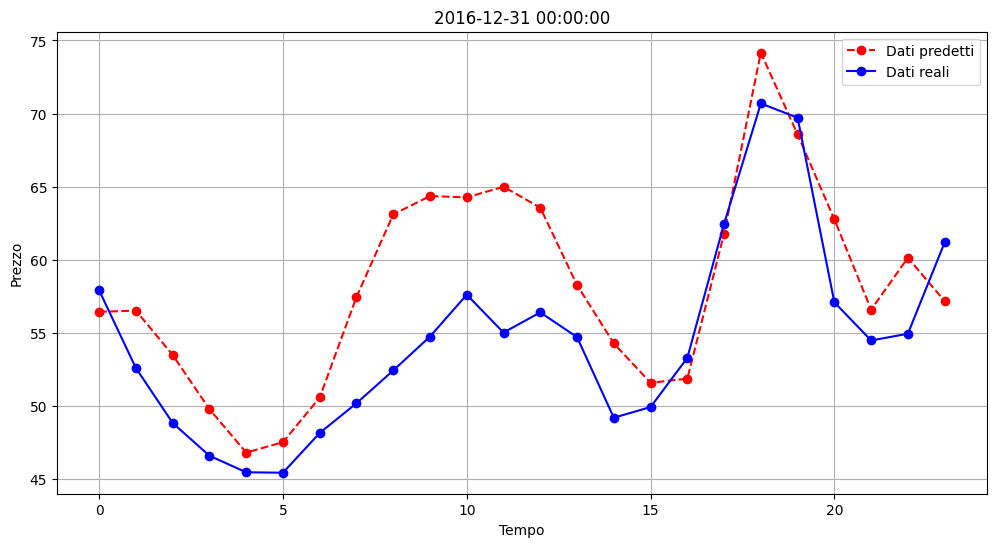

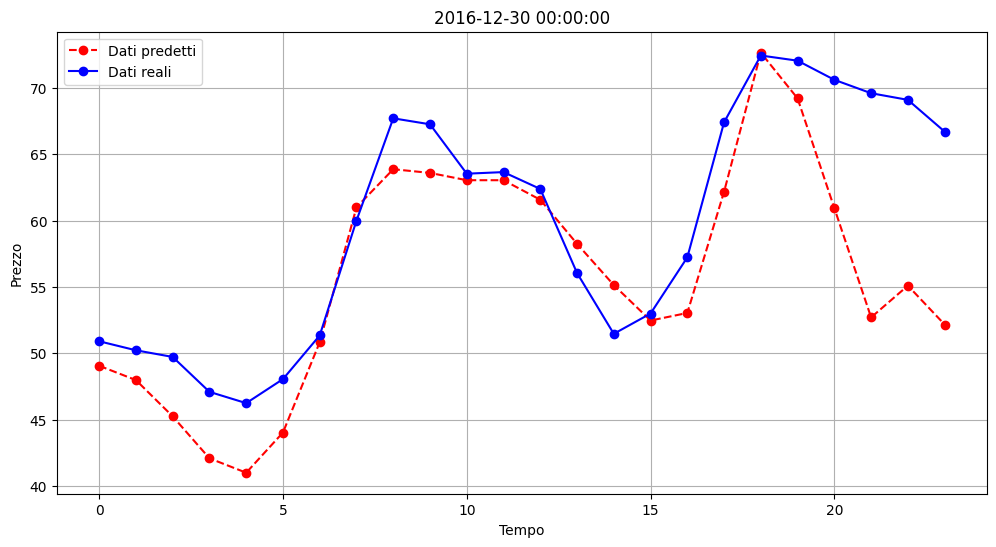

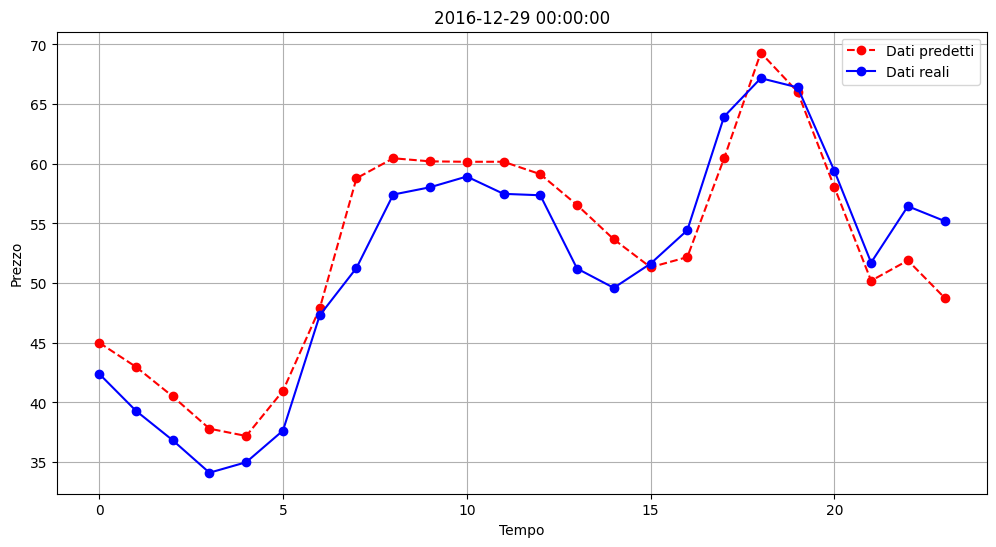

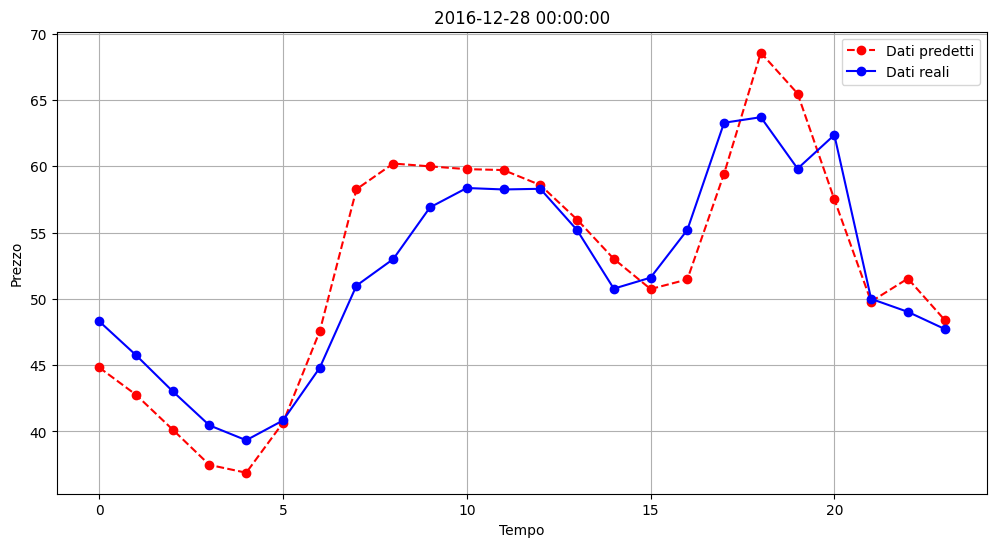

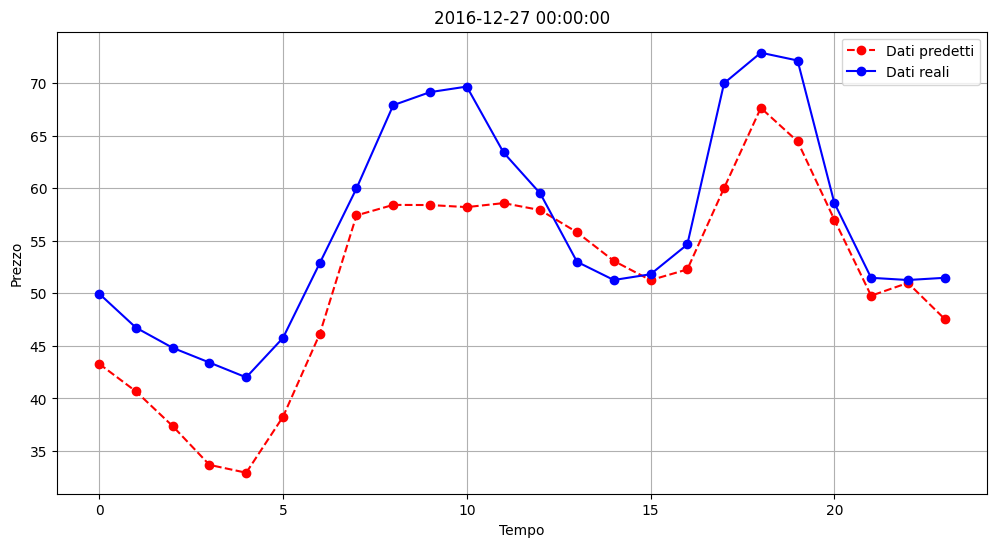

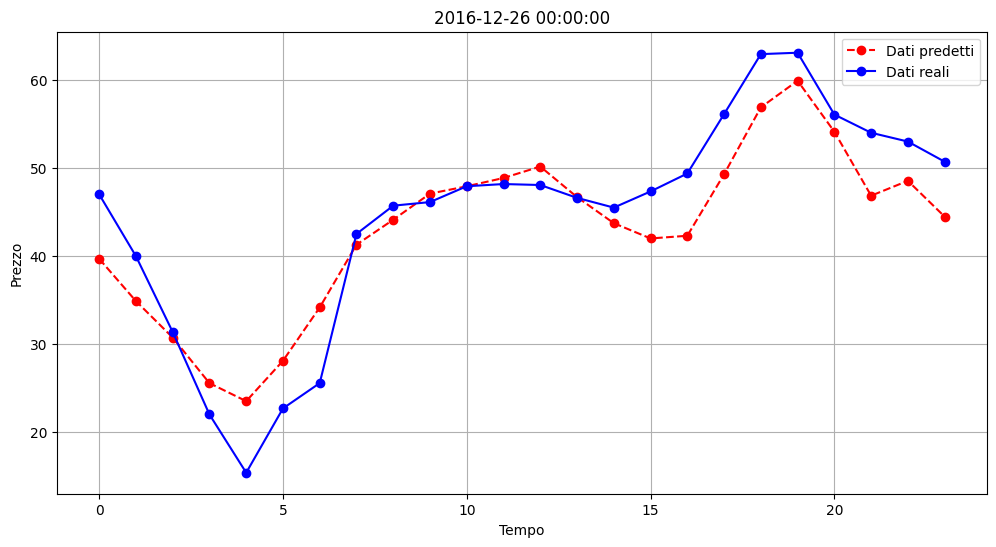

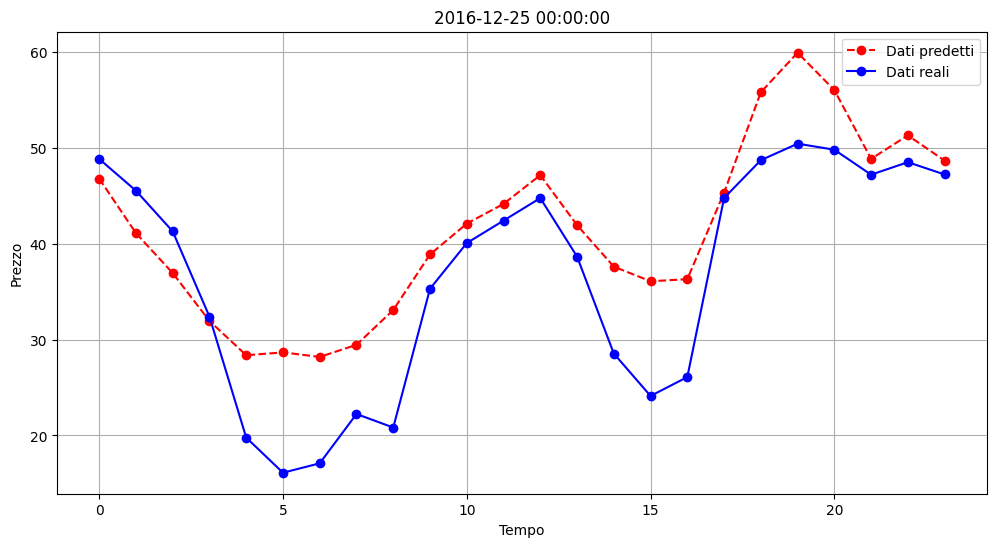

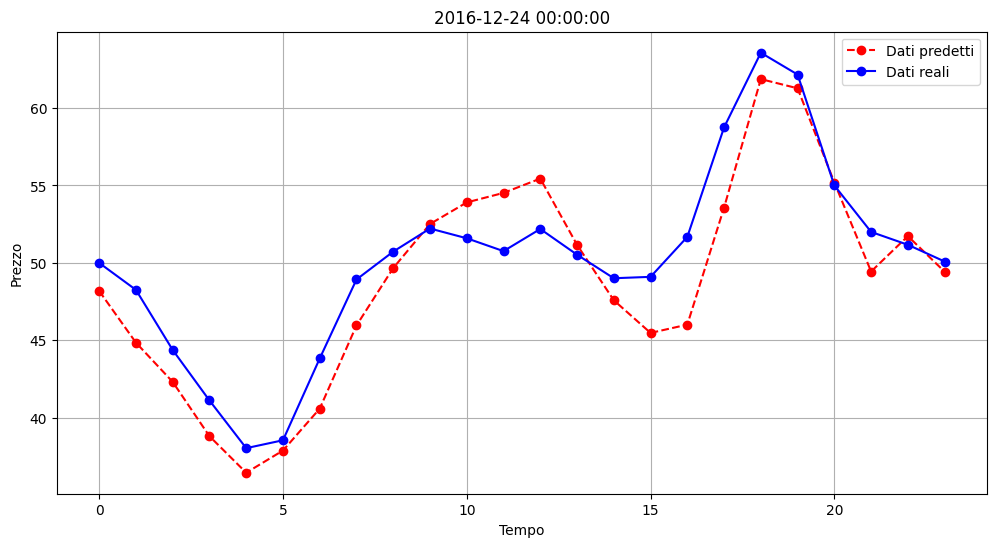

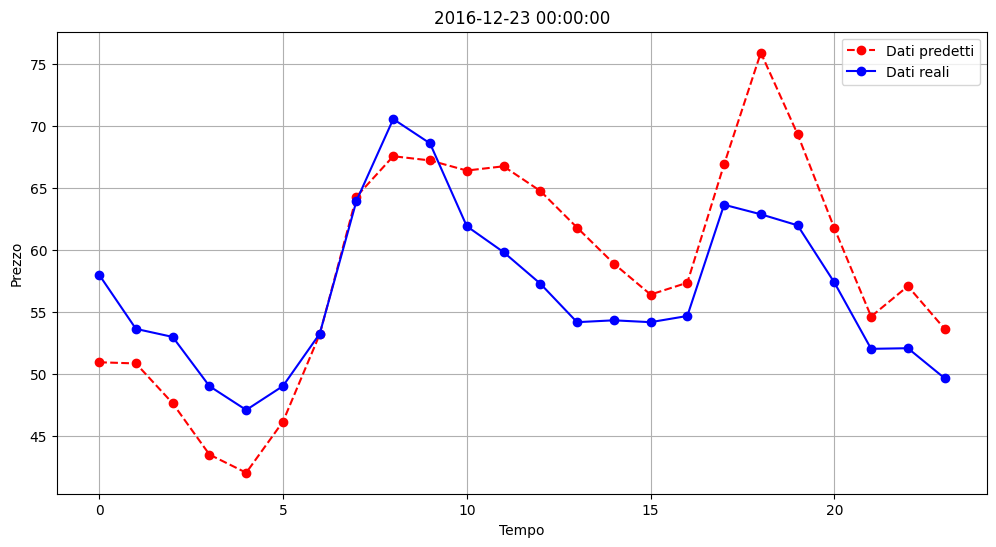

In [119]:
time_index = np.arange(24)

for i in range(1, 10):

    plt.figure(figsize=(12, 6))

    plt.plot(time_index, Y_test_pred[-i, :], label='Dati predetti', color='red', linestyle='--', marker='o')
    plt.plot(time_index, Y_test[-i, :], label='Dati reali', color='blue', linestyle='-', marker='o')

    plt.xlabel('Tempo')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.title(str(indexTest[-i]))
    plt.grid(True)
    plt.show()


### Metrics computation

In [101]:
MAE_DNN = MAE(np.hstack(Y_test), np.hstack(np.array(Y_test_pred))) # sum(abs(y - y_hat))/n
sMAPE_DNN = sMAPE(np.hstack(Y_test), np.hstack(np.array(Y_test_pred))) 
MAPE_DNN = mean_absolute_percentage_error(np.hstack(Y_test), np.hstack(np.array(Y_test_pred)))

In [102]:
MAE_DNN, sMAPE_DNN, MAPE_DNN

(5.095384570300111, 0.1440445925413662, 0.19103852779914468)

## DNN Model

In [103]:
path = "C:/Users/CTLGNN00C/Documents/ENERGY/Progetto MGP"
train_df, test_df = read_data(path, dataset = "FR") # Grouped dataframes (by date)

In [104]:
features = {}
for key in list(opt_hyperparams.keys())[0:11]:
    features[key] = 1

In [105]:
# NOTA: si consiglia di utilizzare almeno un anno di test

# train_years = 2
# test_years = 1
# train_df = train_df.iloc[-365*train_years*24:, :]
# test_df = test_df.iloc[:round(365*test_years)*24, :]

In [106]:
X_train, Y_train, X_val, Y_val, X_test, Y_test, indexTest = \
    _build_and_split_XYs(dfTrain=train_df,dfTest=test_df,  features=features, n_exogenous_inputs=2, shuffle_train=True, percentage_val=0.25,
                        date_test=None, hyperoptimization=True, data_augmentation=False)

In [107]:
# In questo caso lo scaling è effettuato normalizzando i dati rispetto alla norma-2
from epftoolbox.data import DataScaler
from sklearn.preprocessing import StandardScaler


scaler_x = StandardScaler()
scaler_x.fit(X_train)
X_train_norm = scaler_x.transform(X_train)
X_val_norm = scaler_x.transform(X_val)
X_test_norm = scaler_x.transform(X_test)

scaler_y = StandardScaler()
scaler_y.fit(Y_train)
Y_train_norm = scaler_y.transform(Y_train)
Y_val_norm = scaler_y.transform(Y_val)

In [121]:
train_df.iloc[-100:, :]

,Price,Exogenous 1,Exogenous 2
Date,,,
2014-12-30 20:00:00,51.63,82326.0,79067.0
2014-12-30 21:00:00,46.39,80064.0,74953.0
2014-12-30 22:00:00,49.73,79454.0,70912.0
2014-12-30 23:00:00,49.23,80098.0,74745.0
2014-12-31 00:00:00,48.76,76250.0,72805.0
...,...,...,...
2015-01-03 19:00:00,47.62,77508.0,68739.0
2015-01-03 20:00:00,43.79,75506.0,66734.0
2015-01-03 21:00:00,42.44,72883.0,64515.0


In [108]:

neurons = [300, 300, 300]
n_features = X_train.shape[1]
dropout = 0.5

# Scaler = None perchè normalizziamo noi prima
# Lamba_reg è il termine di regolarizzazione -> l1 o l2 ma i risultati migliori si ottengono senza

model_dnn = DNNModel(neurons=neurons, n_features= n_features, dropout=dropout, batch_normalization=True, scaler=None, lambda_reg=None)

In [109]:
model_dnn.fit(X_train_norm, Y_train_norm, X_val_norm, Y_val_norm)

In [110]:
Y_test_pred_norm = model_dnn.predict(X_test_norm)

In [111]:
# Riportiamo i dati predetti alla scala reale
Y_test_pred = scaler_y.inverse_transform(Y_test_pred_norm)

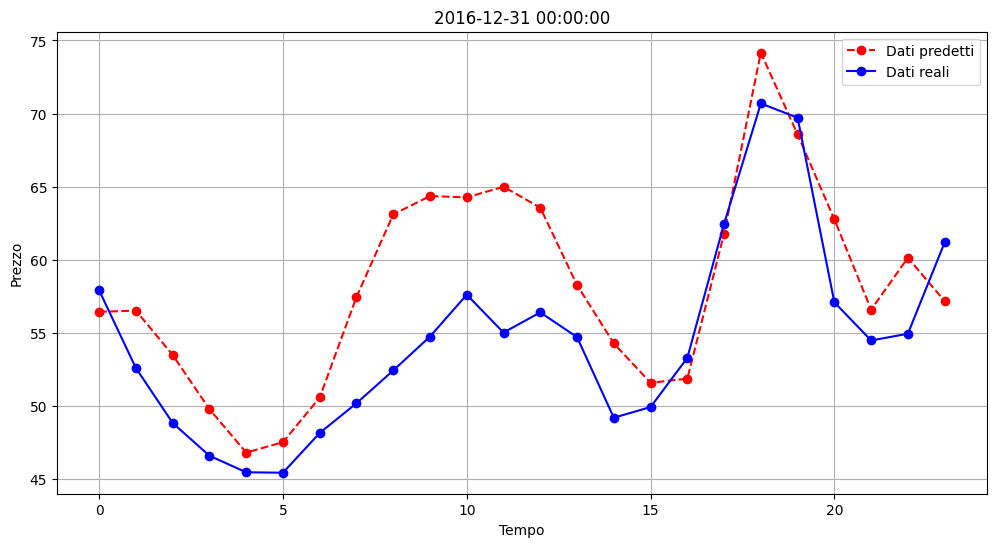

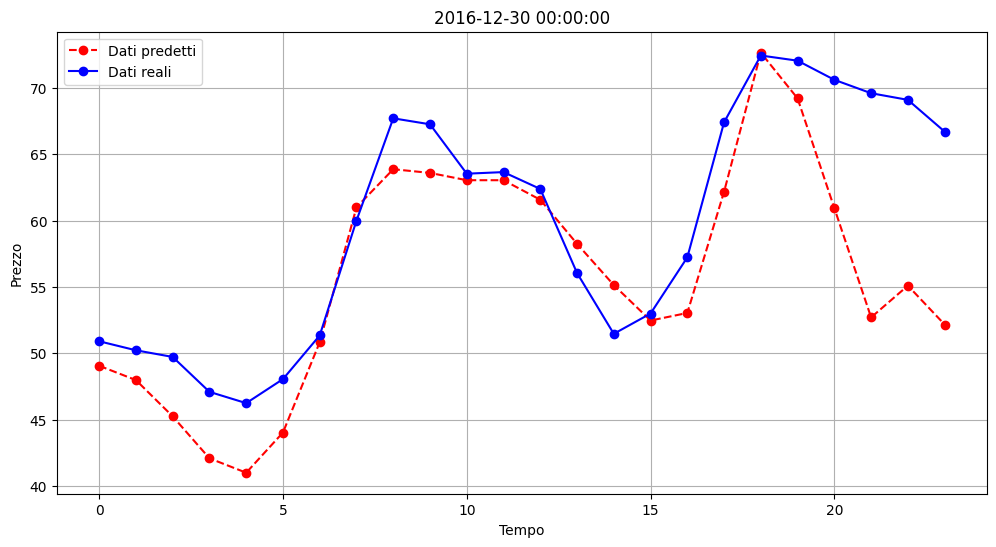

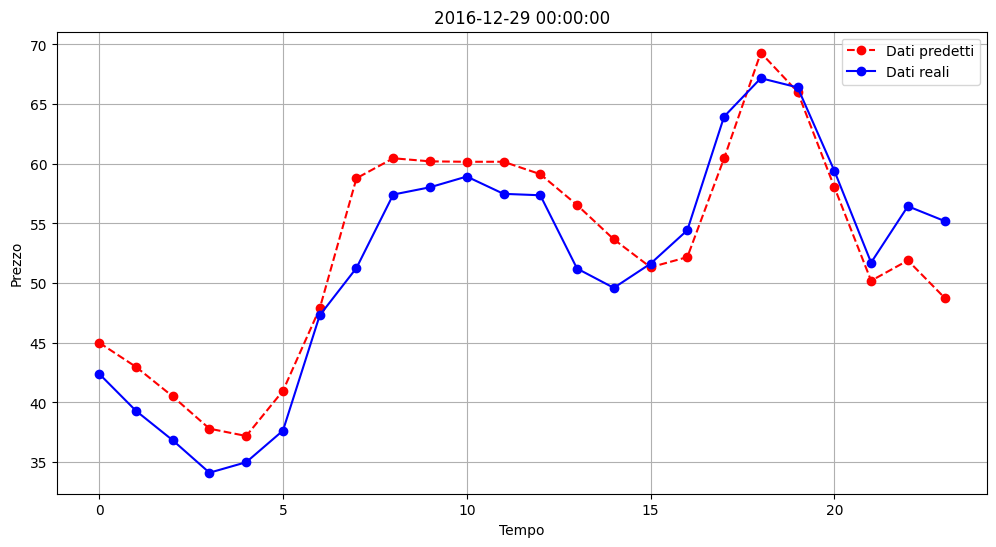

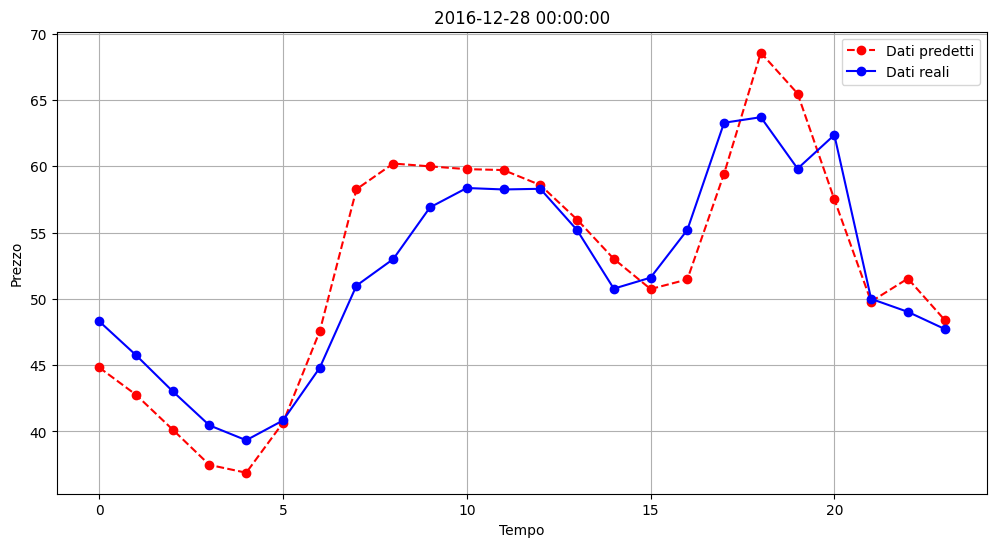

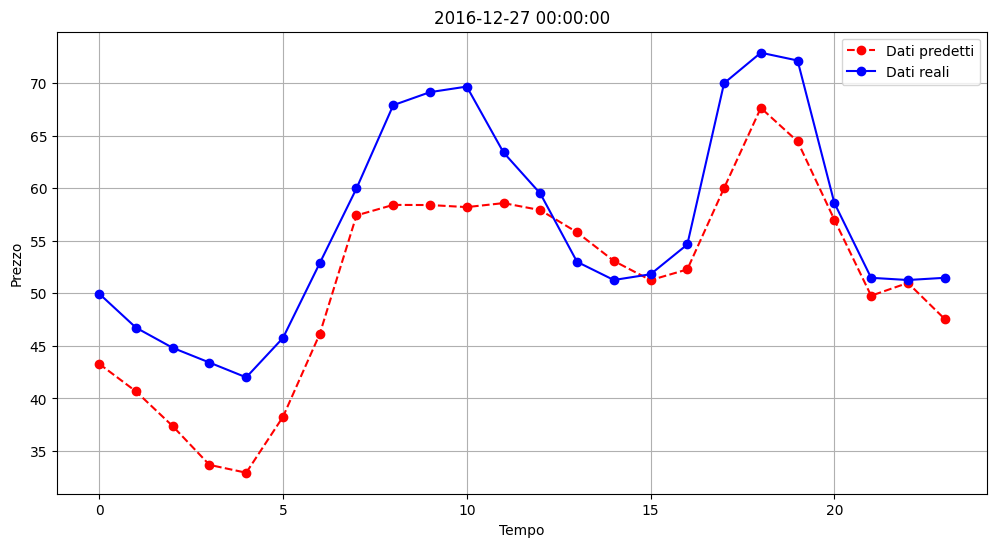

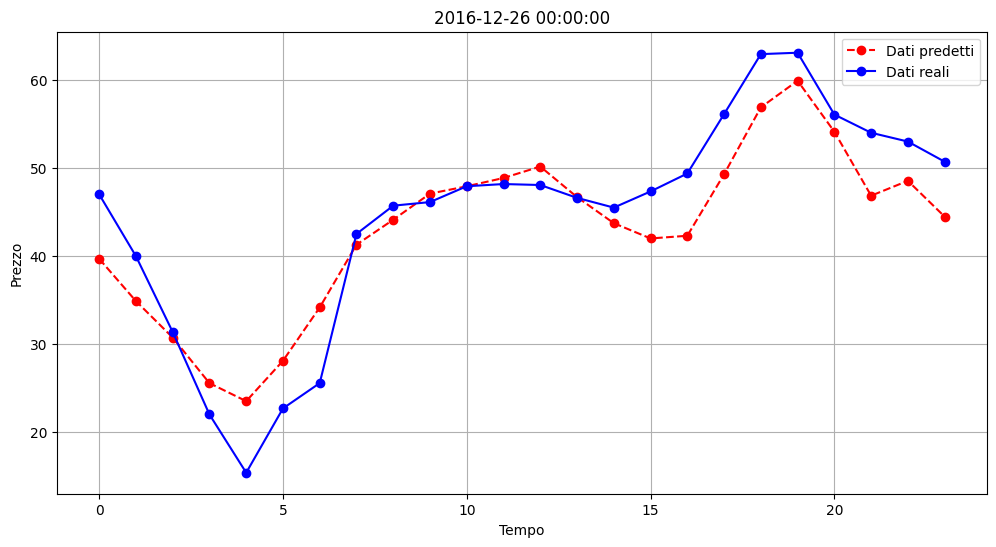

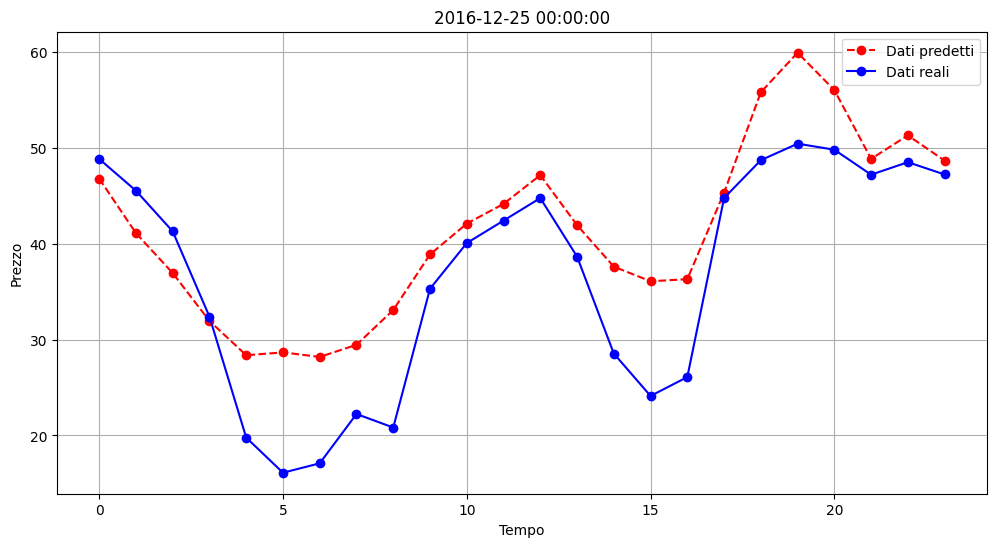

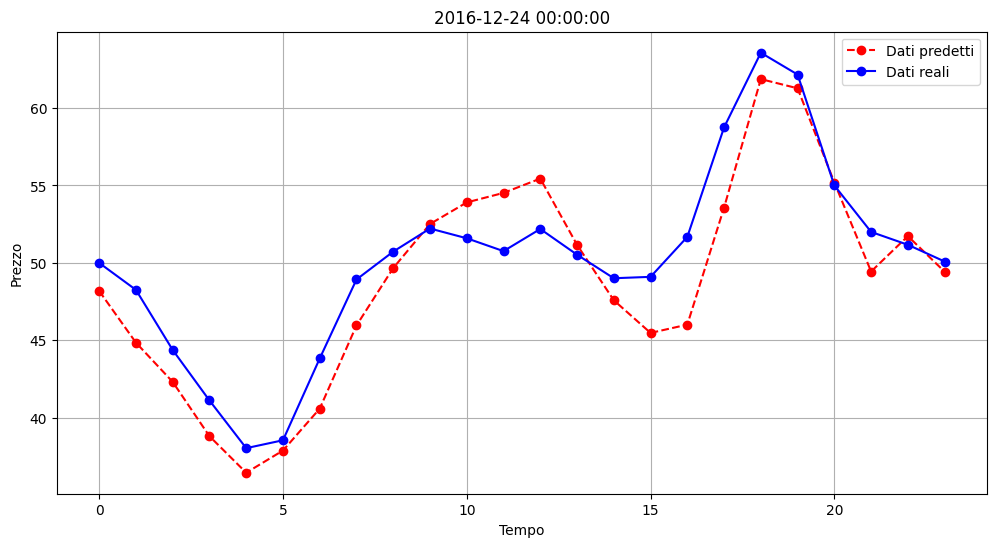

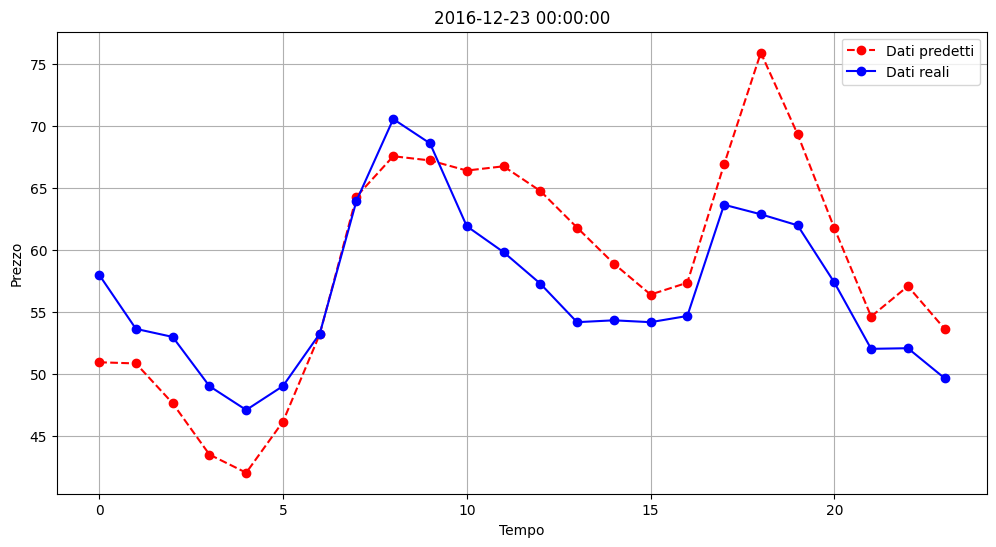

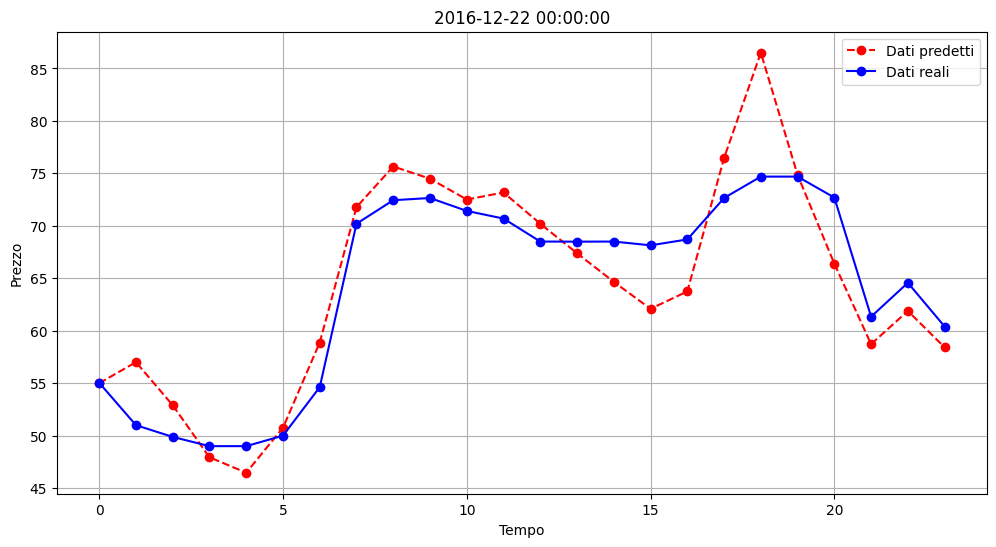

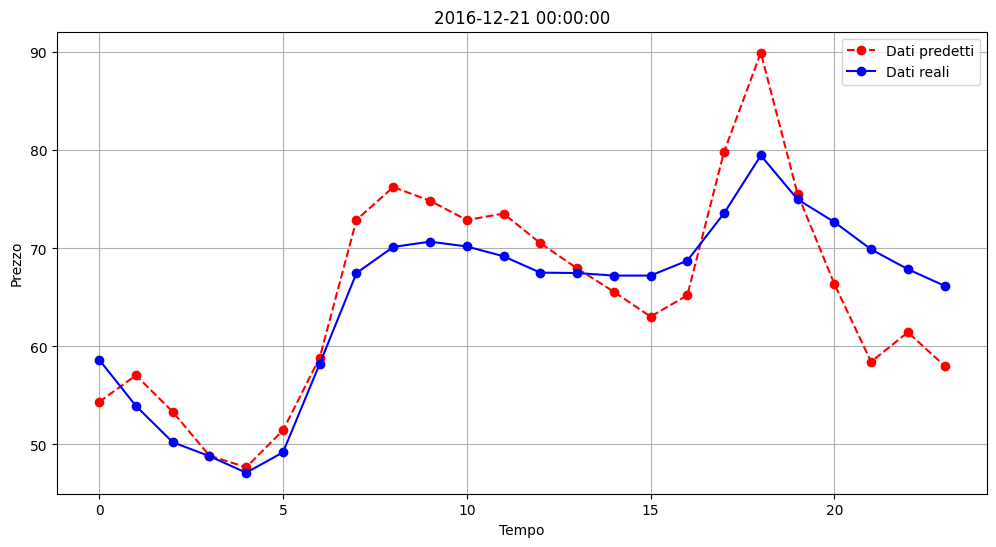

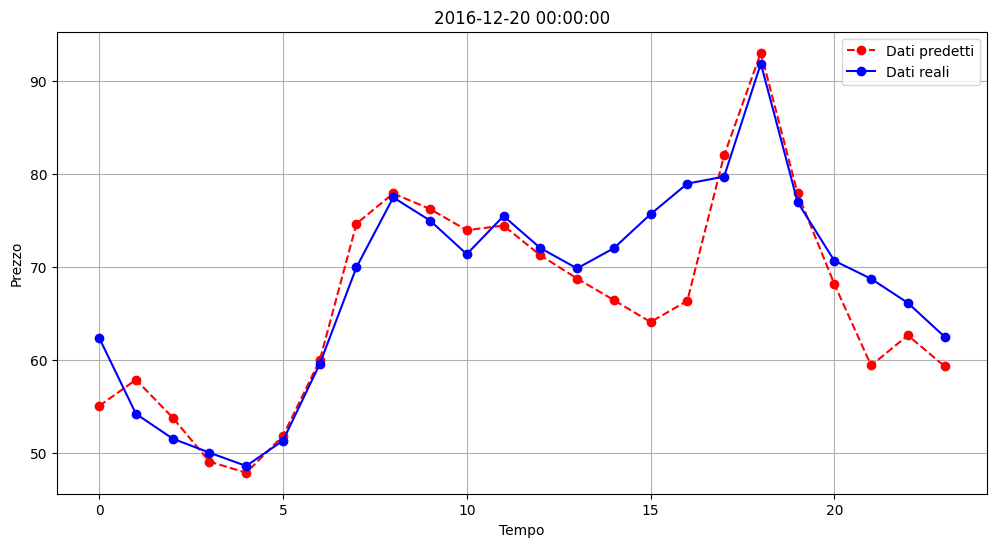

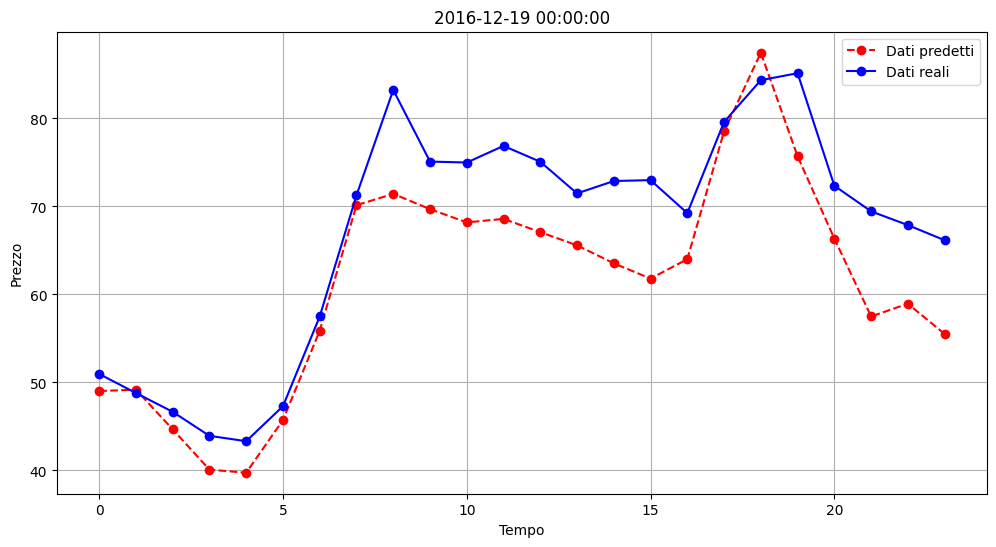

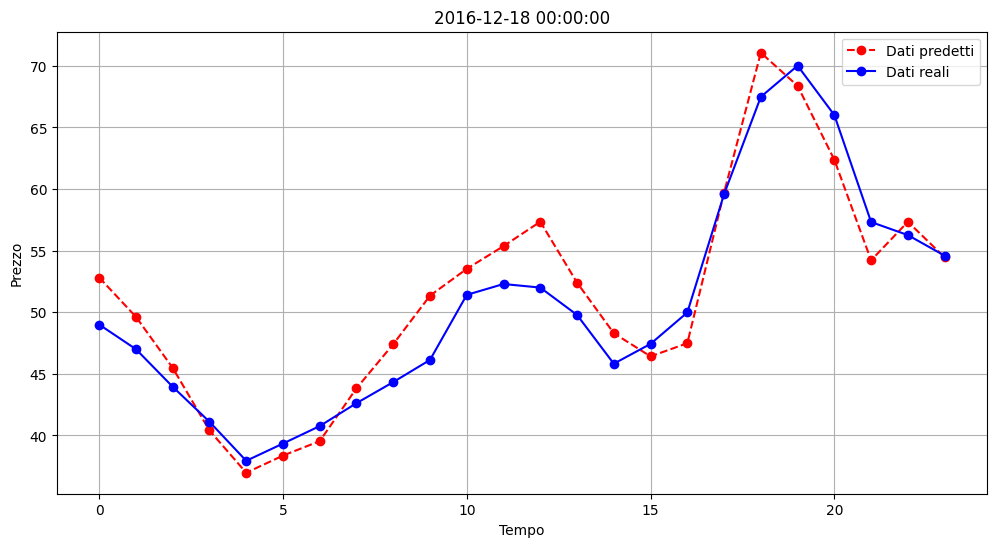

In [112]:
time_index = np.arange(24)

for i in range(1, 15):

    plt.figure(figsize=(12, 6))

    plt.plot(time_index, Y_test_pred[-i, :], label='Dati predetti', color='red', linestyle='--', marker='o')
    plt.plot(time_index, Y_test[-i, :], label='Dati reali', color='blue', linestyle='-', marker='o')

    plt.xlabel('Tempo')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.title(str(indexTest[-i]))
    plt.grid(True)
    plt.show()

### Metrics computation

In [113]:
MAE_DNN = MAE(np.hstack(Y_test), np.hstack(np.array(Y_test_pred))) 
sMAPE_DNN = sMAPE(np.hstack(Y_test), np.hstack(np.array(Y_test_pred))) 
MAPE_DNN = mean_absolute_percentage_error(np.hstack(Y_test), np.hstack(np.array(Y_test_pred)))

In [114]:
MAE_DNN, sMAPE_DNN, MAPE_DNN

(4.767880004049709, 0.13462206582485728, 0.15443188349754183)

Perchè migliora? Ipotesi: quando consideriamo due anni di predizione consideriamo più predizioni soggette a spike per esempio a Natale(24/25) i prezzi e le predizioni si discostano maggiormente, motivo per cui nell'arco dei due anni questo effetto è più marcato.

In [115]:
MAE_0 = MAE(Y_test[:, 0], Y_test_pred[:, 0])

MAE_0

3.979881736448502